## 模型的评估与选择


### 经验误差与过拟合

**错误率（error rate）**：我们通常把分类错误的样本数占样本总数的比例称为错误率。

**精度（accuracy）**：精度等与１减去错误率。

**误差（error）**：我们把机器学习的实际预测输出与样本的真实输出之间的差异称之为误差。

**训练误差(training error)**：机器学习在训练集上的误差称之为训练误差。

**泛化误差（generaliztion error）**：机器学习在新样本上的误差称之为泛化误差。

很明显，我们希望得到泛化误差很小的学习器，但是由于不知道新样本是什么样的，所以只能尽量让训练误差最小。看上去这没什么问题，但是事实上凡事都需要有一个度，很多时候我们甚至能得到在训练集中分类错误率为０，精度为100%的学习器，但是大多数时候这样的模型并不好用。

当学习器把训练样本学的太好了，很可能会把训练样本本身的特点当成了所有潜在样本的特点，事实上这些特点是训练样本所独有的，那么最终的泛化误差就会很大了，也就是说返回性能下降了，这种现象在机器学习中称作过拟合。与过拟合相对的是欠拟合，简单的来说，就是对训练样本的学习还不太到位。

回到最开始的问题，很明显要评估一个模型是否适合解决此类问题最好的办法就是利用泛化误差，但是新样本到底是个什么鬼我们终究还是不知道的，也就无法得到泛化误差，而使用训练误差又会存在过拟合的问题，那么到底应该怎么去评估呢

### 评估方法

要得到泛化误差看上去不太可能，但是我们可以得到一个近似值。我们从已有数据集中抽出来一部分作为测试集，得到测试误差，把这个测试误差作为淡化误差的近似。简单来说，就是把训练集中的一部分数据当做训练集，还有一部分假装是未知样本，然后用这些样本来校验模型。需要注意的问题就是，这一部分被临时抽出来假扮路人的测试集，从头至尾都不可以参加训练。那么，对于一组数据集，又搞训练，有得客串测试，到底要怎么做呢？下面是几种常见的办法：

#### 留出法（hold-out）
直接将数据集D分为两个互斥的集合，其中一个作为训练集S,另一个作为测试集T,他们满足如下关系：
\begin{equation}
D = S \cup T, S \cap T = \emptyset
\end{equation}

比如，D现在包含1000个样本，训练集S包含其中的700个样本，测试集T包含另外的300个样本，用S进行训练之后得到的模型在T里面应用，最终发现有90个样本分类错误，那么错误率就为 (90/300)×100%=30%),相应的精度为1−30%=70%.

在留出法中需要注意以下三点：

要注意在训练集和测试集中保持数据分布的一致性，避免因为数据划分过程引入额外的偏差对最终结果造成影响，比如上面的集合D中包含500个正例和500个反例，那么700个样本组成的训练集中就应当包含350个正例和350个反例，同样的测试集中就应当包含150个正例和150个反例。

要注意就算数据在总体数据集、训练集和测试集中分布一致，但是是存在很多种划分方法，这个时候会对某些特征的权重产生影响。解决这个问题的办法就是进行多次划分，多次训练，多次测试。比如进行100次随机划分（同时保持一致性），然后会得到100个结果（测试误差），最终返回这100个结果的平均。

最后一个需要注意的问题是，因为D被分为了S和T，如果T的占比及较大，训练得到的模型可能更接近于D的模型，而T又太小，评估结果明显不可靠。如果T中多包涵一些样本，相应的S就得减少，最后训练出来的模型可能和D的模型有比较大的差别，从而降低了评估结果的保真性。对于这个问题，没有完美的解决方案，一般的做法是将大约2/3到4/5的样本用于训练，其他的用来测试。

#### 交叉验证法
交叉验证法是把数据集分为k个大小相似的互斥子集，然后每次用第k个子集作为测试器，其他的子集作为训练集。这样循环下去最终会进行k次训练和k次测试，最后返回k个测试结果的均值。通常这个方法也被称作为k交叉验证。
\begin{equation}
D = D_1 \cup D_2...D_k, D_i \cap D_j \neq \emptyset(i\neq j)
\end{equation}

需要注意的问题：

与留出法一样，也需要保持数据分布的一致性。

k的取值，常见的有10次10折交叉验证，也就是k=10

如果数据的样本数m和分成的子集数量k相等，这个时候每一个测试集其实只有一个样本，这种方法也被称为留一法，往往留一法被认为比较准确，但是换来的结果是开销会非常大，再者结果也未必精确，因为NFL定理在这里同样适用。

#### 自助法
自助法对于包含m个样本的数据集D，对它进行采样产生数据集D′,每次一从D中随机挑选一个样本，将其拷贝放入D′，然后再把这个样本放回到D中，使得样本在下次采样的时候依然能够被采集到；把这个过程重复执行m次之后，就得到了包含m个样本数据D′ ，这样做的结果是D中会有一部分样本在D′中多次出现，而另一部分不出现。而样本在m次采集中始终不被采集到的概率是$(1-\frac{1}{m})^m$,取极限得到:

于是，我们可以将D′用作训练集，D−D′用作测试集；这样实际评估的模型和期望评估的模型都是用m个训练样本，而我们仍有数据总量越1/3的、没在训练集中出现的样本用于测试，这样的测试结果，也称作“包外估计”。

要注意的问题：

自助法在数据集比较小，难以有效划分训练集、测试集的时候很有用。同时，自助法能从初始数据集中产生多个不同的训练集。

自助法产生的数据集改变了初始数据集的分布，会引入估计偏差，当数据量足够的时候留出法和交叉验证法更常用一些。

### 性能度量

做的很好，R^2是评价模型表现的方法之一，每个机器学习模型的建立都要有相对应的评价指标，后面我们会学到更多的评价指标。不过R^2其实也有很多局限性需要注意

https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats

skearn对于常见的模型表现衡量方法也有详细的介绍。

http://scikit-learn.org/stable/modules/model_evaluation.html

对机器学习的泛化性能进行评估，除了上面的评估其误差外，还需要去评估其能力，这就是性能度量。也就是预测的数值到底和原始数值有多接近。

在预测任务中，给定样本集，$D = (x_1,y_1), (x_2,y_2),...(x_m,y_m)$其中$y_i$是$x_i$ 的真实标记，要评估$f$的性能，就是要把学习器预测结果$f(x)$与真实标记y作比较。

#### 回归问题的性能度量：均方误差（mean squared error)
回归任务最常用的性能度量是均方误差（方差的平均数）：
\begin{equation}
E(f;D) = \frac{1}{m} \sum^m_{i=1}(f(x_i)-y)^2
\end{equation}

#### 分类问题的粗略度量：错误率与精度
错误率和精度是分类任务中常用的两种性能度量，既适用于二分类任务，也适用于多分类任务。错误率是分类错误的样本数占样本总数的比例，精度则是分类正确的样本数占总数的比例。

错误率可以定义为：
\begin{equation}
E(f;D) = \frac{1}{M}\sum^m_{i=1}(f(x_i)\neq y_i)
\end{equation}

精度可以定义为：
\begin{equation}
add(f;D) = \frac{1}{M}\sum^m_{i=1}(f(x_i) = y_i) =1 - E(f;D)
\end{equation}

#### 分类任务的精确度量：查准率、查全率与Ｆ1
错误率与精度虽然常用，但不能满足所有任务需求。比如，在一个人工智能辅助诊断病情的模型中，错误率衡量的是有多少比例的人的身体状况被判别错误，但是我们关心的是“有多少**有病的人被诊断出来没有病**”，那么错误率显然是不能给出答案的。查准率与查全率则更适应于此类场景。

拿最简单的二分类问题来说,对于二分类问题，可以根据真实类别与机器学习预测的类别的组合划分出来四种不同的情况，假设上面的诊断模型输出的结果为有病或没病，那么预测结果与真实结果可以得到下面组合：

<table>
   <tr>
      <td>情况</td>
      <td>预测有病</td>
      <td>预测没病</td>
   </tr>
   <tr>
      <td>真实有病</td>
      <td>130</td>
      <td>40</td>
   </tr>
   <tr>
      <td>真实没病</td>
      <td>50</td>
      <td>200</td>
   </tr>
</table>

我们想要知道的是，有病的人是真的有病，而不是假的有病，真的有病的人又查出来了几个，用上面的表格计算可以得到：

$查的全不全=\frac{真的有病查出来也有病}{真的有病查出来也有病+真的有病但没查出来}=\frac{130}{130+40}$

$查的准不准=\frac{真的有病查出来也有病}{真实没病但查出来有病}=\frac{130}{130+50}$

可以看出来，查的全不全这个问题上，模型诊断出来了130个人是有病的，但是事实上真实有病的病人一共有130+40个，漏掉了40个真的有病的人。 130/130+40就是查全率。

而对于查的准不准这个问题上，预测了130+50个人是有病的，但是这其中50个人其实是没有病的，真正正确的只有130个人，其他50个人是假的有病（网络流行语）。
130/130+50就是查准率。

把上面这个看病的例子，用一个泛型（面向对象程序设计中的一种实现多态，多类型支持的技巧）来描述，就有了下面这个混淆矩阵：

<table>
   <tr>
      <td>情况</td>
      <td>预测为True</td>
      <td>预测为False</td>
   </tr>
   <tr>
      <td>真实为True</td>
      <td>TP(真正例）</td>
      <td>FP(假正例）</td>
   </tr>
   <tr>
      <td>真实为False</td>
      <td>FN(假反例）</td>
      <td>TN(真反例）</td>
   </tr>
</table>

对于这个矩阵，precision(查准率）和recall（查全率）可以表示为：

$P=\frac{TP}{TP+FP}$
$R=\frac{TP}{TP+FN}$

很明显，查准率与查全率是一对相互矛盾的度量。一般来说，查准率高的时候，查全率往往会偏低;查全率高的时候，查准率往往偏低。追求查准率和查全率都没有错，但是大部分时候只能选一个，这个要取决于具体的问题，比如上面的问题中，我们宁愿把没病的人诊断成有病，也不要错过一个真是有病的人被诊断为没病（这不是耽搁人嘛），所以我们应该追求的是查全率。但另一方面，我们又不希望给没有病的人造成没有必要的麻烦，这个时候应该去追求较高的查准率。对于看病这个问题，很多时候我们更倾向于查全，尽管会造成查准率降低。

#### PR图
但是并不是所有的问题都像看病问题这个特殊，大部分时候我们需要同时考虑查准率与查全率，根据查准率与查全率可以绘制出来P-R曲线和P-R图：

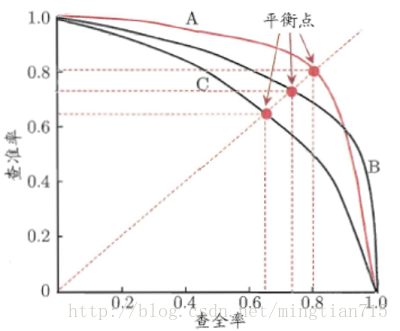
如果一个学习器的PR曲线被另一个学习器的PR曲线完全包住，则后者的性能优于前者。上图中A明显优于C。

#### BEP
如果两个学习器的PR曲线相交，就不能着急下结论了，这个时候一般回家算两条曲线下面包裹的面积，面积大的很明显取得PR双高的概率要更高。但是这个不太容易估算。对此，有人设计了BEP，平衡点（Break-Even Point）。

BEP是指查准率=查全率时候的取值，也就是画一条直线f(x)=x，曲线和这条直线的交点就是BEP。比如上图中A的BEP为0.8，B的BEP为0.72， 按照BEP来比较，学习器A优于B。但是，这也并不是绝对的，毕竟BEP还是过于简化了些。，更常用的方法是F1度量.

在一些应用中，对查准率和查全率的重视程度是不同的，比如上面看病的例子，更加追求查全率，以避免错过真正有病的人。但是在用户分类系统中，为了避免打扰到用户，把人家不喜欢的东西推给人家真的很烦啦。。。。，这个时候更侧重于查准率。F1度量可以帮助我们很好的去找到适合我们的点。

$F_\beta=\frac{(1+\beta^2)×P×R}{(\beta^2×P)+R}$

其中β>0度量了查全率对查准率的相对重要性。

β=1时退化为标准的F1;

β>1的时候查全率有更大影响；

β<1的时候查准率有更大影响；

对于多分类问题的多个混淆矩阵，或者二分类问题的多次训练得出的多个混淆矩阵。这个时候要综合考虑其查准率，查全率。

一种直接的做法是现在各个混淆矩阵上计算出来各自的查准率与查全率，在计算平均值，得到宏查准率(macro-P)、宏查全率(macro-R)，以及对应的宏F1(macro-F1):

$macro-P=\frac{1}{n}\sum_{i=1}^nP_i$

$macro-R=\frac{1}{n}\sum_{i=1}^nR_i$

$macro-F1=\frac{2×macro-P×macro-R}{macro-P+macro-R}$

还可以现将各个混淆矩阵对应的元素进行平均，得到TP、FP、TN、FN的平均值记做$\overline{TP}、\overline{FP}、\overline{TN}、\overline{FN}$,在基于这些平均值计算微查准率(micro-P)、微查全率(micro-R)以及微F
1(micro-F1):

$micro-P=\frac{\overline{TP}}{\overline{TP}+\overline{FP}}$

$micro-R=\frac{\overline{TP}}{\overline{TP}+\overline{FN}}$

$micro-F1=\frac{2×micro-P×micro-R}{micro-P+micro-R}$

#### Learning curve
传统的机器学习算法（又被称为基于统计的机器学习）在数据量达到一定程度后，更多的数据无法提升模型的表现。深度学习的一个优势就是它可以把大量的数据利用起来，提升学习表现。

这里还有更多关于学习曲线的介绍：

https://www.coursera.org/learn/machine-learning/lecture/Kont7/learning-curves

http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

## bias-variance trade-off

对于网格搜索算法和K折交叉验证，你可以参考这篇文章来帮助自己更好地理解：https://zhuanlan.zhihu.com/p/25637642

bias-variance trade-off是统计机器学习中一个非常重要的内容。同时网络上很多解释描述不够准确。实际上关于bias-variance trade-off有非常严格的数学定义，解释的比较好的是[The Elements of Statistical Learning (ESL)](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)的第7章。不过这本书涉及比较多的理论细节，这里我用尽量通俗的语言解释一下书中内容，有兴趣的同学可以去看原书。

准备知识:

>*在开始之前，我们不妨考虑一个问题。在概率论中，我们学过方差是用来度量随机变量和其数学期望（即均值）之间的偏离程度。那么在我们这个问题中，随机变量是什么？随机性（randomness）又是什么。今后在涉及到期望，方差，概率等概念时，我们首先要明确我们的场景下，什么是固定的，什么是随机变化的，randomness来自那里。

>*为了搞懂这个问题，我们来定义什么是泛化误差(generalization error)。严格的定义请参考ELS一书中的公式7.3。通俗来说，我们根据一个固定的训练集，训练出一个模型hat_f，然后我们从整个样本空间中随机抽一个样本测试hat_f在该样本上的误差。这个误差的期望就是泛化误差。在我们的问题3中，我们在测试集上的平均误差可以看作泛化误差的近似。这里的随机变量是模型在随机抽取的样本上的误差，随机性来自随机采样。

>*通常对于一组固定的参数，我们希望在所有可能的训练集上得到的模型，都有比较好的泛化误差。比如我们会讨论“SVM的泛化误差”，“岭回归的泛化误差”，而不会讨论“SVM在这个训练集下的泛化误差”。因此，我们除了对随机抽取的测试样本求期望之外，再对所有可能的训练数据集求期望，得到的也叫做期望测试误差或者期望泛化误差 (expected generalization error)。通常我们讨论的泛化误差是期望泛化误差。

Bias-Variance分解

>*有了准备知识，我们可以来分析这个题目中的偏差与方差究竟是什么了。我们考虑一个训练集外的样本$x_0$。然后模型在样本$x_0$上的均方误差可以写作$E[(Y-\hat{f}(x_0))^2]$, 其中Y是样本$x_0$的标签。这里的期望符号中，randomness来自于两部分，一部分是观测误差，也就是随机噪音；另一部分是随机的训练数据（回忆在期望泛化误差中，我们对所有的训练集求期望）。我们把这个式子展开，发现他可以分解为三部分，第一部分与观测误差有关，属于不可控制的范围，我们暂时不管他。第二部分为$[E\hat{f}(x_0)-f(x_0)]^2$。这里$f(x_0)$表示“真实模型”的输出，你可以理解为是一个只有老天爷知道的模型，并且这个模型从来不会犯错，而我们观测到的Y就是$f(x_0)$加上一个观测误差。而$E\hat{f}(x_0)$可以理解为在不同训练集和随机噪音下，我们训练得到许多不同的\$hat_f$，用这些$\hat_f$对$x_0$进行预测的期望。这个期望与真实fx之间的偏移，就是我们这里所说的偏差 (bias)。

>*分解的第三部分可以写作$E[\hat{f}(x_0)-\hat{f}(x_0)]^2$，这里你应该很快能发现，这个式子就是一个典型的方差公式。我们的随机变量就是$\hat{f}$。直观解释当取训练数据发生扰动时，我们得到的模型对$x_0$预测的越分散，那么方差也就越大。

回到问题当中:

>*了解了偏差和方差的真实含义之后。我们回到我们的问题当中。我们说当模型欠拟合时，偏差大，方差小。而当模型过拟合时，方差大，偏差小。那么如何和我们前面的分析对应呢？

>*当模型欠拟合时，模型没有很好的捕获训练数据中的特征，因此$E\hat{f}(x_0)$与真实$f(x_0)$偏差较大。你可以认为这个时候我们的模型非常“懒惰”，压根没有认真学习训练数据。因此当训练数据发生变化时，模型的输出不会发生很大的变化，方差小，偏差大。

>*当模型过拟合时，模型在训练集上无限接近真实模型$f(x_0)$（在训练集外可能表现很差）。当我们对所有训练集求期望时，$E\hat{f}(x_0)$也无限接近真实的$f(x_0)$（注意，这里只是期望意义下）。这个时候你可以认为模型过于“勤奋”，把训练数据中的所有信息都学习到了，甚至包括噪音。那么一旦训练数据发生一点变化，模型在测试样本上也会发生非常大的变化。

>*所以这也是为什么有些资料会说，bias和variance都是针对泛化误差而言。知乎高票答案中，说bias是针对训练误差而言这个是不对的（后面的答案有纠正，但是没有顶上去）。

>*这部分ESL中没有给出推导，大家可以参考伯明翰大学的[课件](http://www.cs.bham.ac.uk/~jxb/INC/l9.pdf)。另外课件中的这个图可以很形象的说明问题

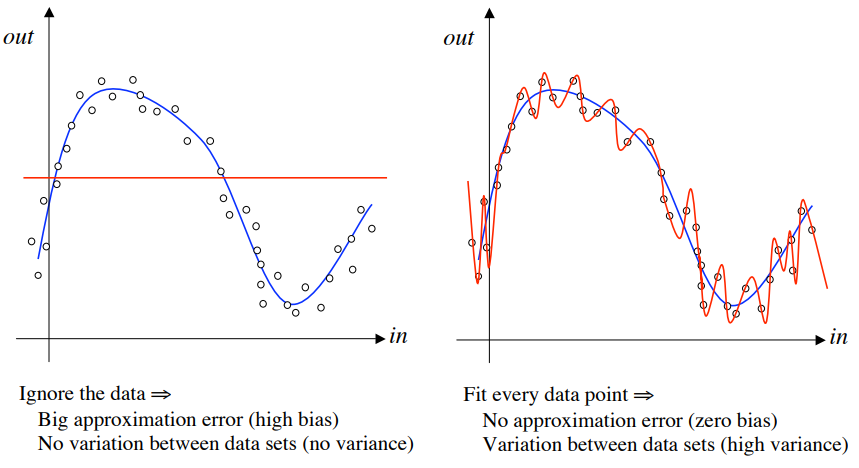

在左图欠拟合时（红线），训练误差与泛化误差均比较高，同时当训练数据发生变化时，对模型的输出带来的影响很小。而右图过拟合时，训练误差很小，泛化误差很大，同时如果我们对训练数据做一点扰动，那么红色曲线就会剧烈的变动，也就造成方差很大。

K折交叉验证FAQ
Q: 我们用K折交叉验证的目的是什么？

A：K折交叉验证是为了更准确的评估模型的期望泛化误差 (关于模型泛化误差的定义参考 bias-variance trade-off部分的补充)。K折交叉验证把训练集划分为K份。每次取K-1份作为模型的训练数据，剩下的一份作为模型的验证数据，并测试模型在验证集上的误差。在重复K次后，把K个不相交的验证集上的误差求平均，作为期望泛化误差的估计。注意这里的验证数据是从训练集中抽取的。

Q:为什么我们要评估模型的期望泛化误差？

A：因为我们总是想要期望泛化误差最低的模型。那么当我们对模型做参数选择的时候，对于不同的参数，我们如果能准确的估计他的期望泛化误差，就能够选择出最优的参数。这也是GridSearch的原理。

Q:既然你说测试集上的平均误差是期望泛化误差的近似，为什么我们不直接用测试集评估泛化误差？

A：如果我们对着测试集进行参数调优，会使得我们低估(under-estimate)模型的泛化误差。因为你此时是试图让模型在这个特定的测试集上误差更小。而我们所说的泛化误差，应该是所有可能的样本上的误差的期望。理论上，测试集仅仅用来衡量最终模型的性能。在我们确定最终模型前，我们不应该使用测试集。这一部分还有一些对应实际场景中的解释，请看分割线后的补充。

Q:K折交叉验证相比固定的验证集和留一交叉验证(Leave One Out CV)有什么好处？为什么我们经常使用K折交叉验证？

A：K折交叉验证实际上也是一个bias-variance trade-off。我们在下一个问题（关于K折交叉验证的bias-variance trade-off)的回答中，会一起解释K折交叉验证的优点。

Q：我在网上看到有人说K折交叉验证“当K比较小时，方差小，偏差大；当K比较大时，方差大，偏差小”，这是怎么回事？和我们前面模型的bias-variance trade-off是一样的吗？

A: 不一样。很不幸这个问题网络上的中文资料有很多是错误的，所以同学参考这些资料的时候同样容易confused。ESL的第7章中对这个问题有很好的解释。另外这个[知乎答案](https://www.zhihu.com/question/27068705/answer/99541217)的解释也是正确的。

>-为了搞清楚这个问题，我们先要明确，我们在K折交叉验证上说的bias是对谁的bias？这个问题从我们的FAQ1中其实很容易想明白：这里的bias是我们根据K折交叉验证得到的泛化误差评估（的期望），与模型真实期望泛化误差之间的偏差。

>-在搞清楚我们偏差针对的目标后，你应该想到我们现在要做什么了——没错，这里又出现了偏差，方差，那么我们首先要找出randomness是什么。不同教材中对这里的randomness定义都不太一样，我个人总结来看，这里的randomness来自多方面: (1) 训练数据 (2)观测噪音 (3)数据的划分方式。因此实际上这个问题分析起来要比我们之前分析的bias-variance trade-off更复杂一些。

>-前两者与我们在模型bias-variance trade-off 部分提到的类似。当我们的训练数据发生扰动时，我们利用交叉验证得到的评估结果也会发生变化。我们来解释一下数据划分。由于我们把训练集划分为了训练数据和验证数据。那么一方面，模型的训练数据变少了。我们评估较少训练数据训练出来的模型时，会与模型的期望泛化误差发生较大偏差。另一方面，由于数据划分的随机性，可能会出现验证数据恰好是比较好预测，或者恰好比较难预测的情况。也使得对模型的泛化误差估计不准。可以参考ESL的241页。

>-那么回到问题本身，当K比较小的时候，我们评估的模型利用的训练数据比较少，在期望意义下会与模型的真实泛化误差发生比较大的偏差。当K比较大的时候，我们评估模型利用的数据比较多，在期望意义下与模型的真实泛化误差偏差比较小。

>-对于方差部分，我们可能会认为，当K比较大时，我们对更多的评估误差取了平均，那么方差应该更小才对。但是我们忽略了两点：(1)当K比较大时，验证数据减少，那么在每一份验证数据上的方差变大。(2)对于K个模型，他们所利用的训练数据重合部分更大。在极端情况下，K＝N时，所有的模型几乎都用了同样的训练数据，使得这些模型之间的相关系数接近于1，所以求平均并不能减少评估的方差。实际上当K＝N时候，模型评估的方差是最大的。

>-在SUBMODEL SELECTION AND EVALUATION IN REGRESSION这篇论文中, 作者通过实验发现通常K＝5或者K＝10的时候，对模型的泛化误差评估最准。

### 属性关联
做得很棒，这里补充一种判断属性关联度的方法,希望你可以尝试一下：
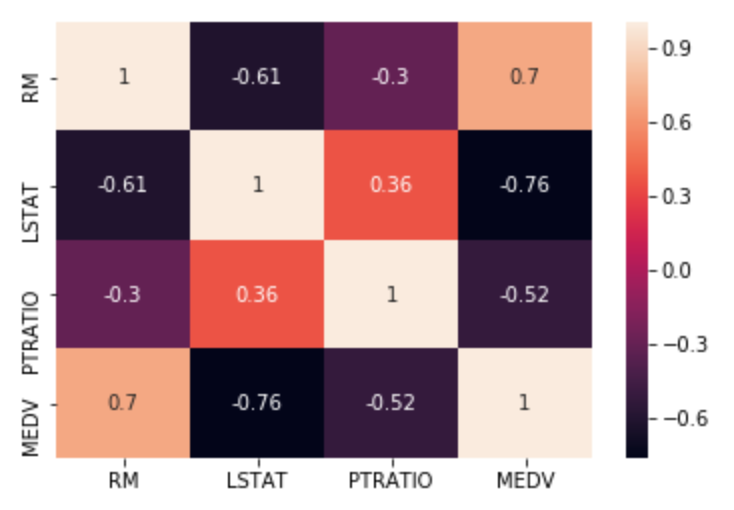

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

## 偏差和方差

对偏差和方差的理解很不错！借用西瓜书上的比喻，用机器学习来判断一个物体是不是树叶，underfitting是以为所有绿色的都是树叶（没学会该学的）；overfitting是以为树叶都要有锯齿（学过头了，不该学的也学了进去）。这两者都不是我们想要的。

维基百科对此也有详细的解释 https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

华盛顿大学机器学习的课程详细讲了这个问题，你可以免费观看。 https://www.coursera.org/learn/ml-regression/home/week/3

sklearn 也有对 validation curve的介绍：http://scikit-learn.org/stable/modules/learning_curve.html

